# 3.15.x Final Assignment

### Assignment Instructions

#### Part 1   |   Standard Difficulty Level

In this first part, you will be working with a datasets containing information of over 20k Software Professionals with different variables like: 

- the `Rating` of the company given by the employee,
- the `Company Name`, 
- the `Job Title` of the employee, 
- the employee `Salary` (in Indian Rupee ₹), 
- the number of `Salaries Reported`, 
- the `Location` of the company, 
- the `Employment Status` and
- the category of the `Job Roles` 

The dataset name is `Software Professionals Salary.csv` and you will find it in the `data` folder of this repository. At [this link](https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022?search=salary) you can find the source of the data (Kaggle) as well as more information on its composition. 

**Setup:** Import the necessary libraries and load the .csv file to a DataFrame named `sps`. Check that all columns have the correct data type. 

In [35]:
import pandas as pd
import seaborn as sns
import requests

In [36]:
sps = pd.read_csv("data/Software Professionals Salary.csv")

In [4]:
sps.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [5]:
sps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22770 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


1. What is the shape (rows, cols) of the `sps` DataFrame? 

In [6]:
sps.shape

(22770, 8)

2. How many unique `Job Roles` are there in the dataset? 

In [7]:
sps['Job Roles'].unique()

array(['Android', 'Backend', 'Database', 'Frontend', 'IOS', 'Java',
       'Mobile', 'SDE', 'Python', 'Web', 'Testing'], dtype=object)

In [8]:
len(sps['Job Roles'].unique())

11

3. How many unique `Job Title` are there for the "Python" `Job Role`? 

In [9]:
sps[sps['Job Roles']=='Python']['Job Title'].unique()

array(['Python Developer', 'Python Developer - Intern',
       'Python Developer - Contractor', 'Python Developer Contractor',
       'Senior Python Developer', 'Junior Python Developer',
       'Python/Django Developer', 'Systems Developer/Python Developer',
       'Python', 'Python Programmer',
       'Senior Python Developer - Contractor',
       'Junior Python Developer - Intern',
       'Junior Python Developer Contractor',
       'Python/Django Developer - Intern',
       'Python/Django Developer - Contractor',
       'Systems Developer/Python Developer - Intern',
       'Python/Odoo Developer', 'Python Programmer - Intern',
       'Python Full Stack Developer',
       'Python Full Stack Developer - Intern',
       'Full Stack Python Developer', 'Python Engineer',
       'Junior Python/Django Developer', 'Python Web Developer',
       'Middle Python Developer', 'Lead Python Developer',
       'As A Python Developer', 'Python AI Developer',
       'Python AI Developer - Intern', '

In [10]:
len(sps[sps['Job Roles']=='Python']['Job Title'].unique())

102

4. Of the `Company Name`s that are listed in the DataFrame, **how many** have a "Python" `Job Role` with a `Job Title` containing the **substring** "Analyst"?

In [11]:
py = sps[sps['Job Roles']=='Python']['Job Title'].unique()

In [12]:
sps[sps['Job Title'].isin([string for string in py if 'Analyst' in string])]

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
11352,3.7,Ocwen Financial,Python Analyst,500000,1,Bangalore,Full Time,Python
11371,4.0,TrioHats Consulting,Python and Machine Learning Analyst,100000,1,Bangalore,Full Time,Python
11541,3.3,Infosys,Technology Analyst - Python Developer,600000,1,Chennai,Full Time,Python


In [13]:
sps[sps['Job Title'].isin([string for string in py if 'Analy' in string])].shape[0]

3

5. Which `Company Name` has the highest number of `Salaries Reported` (across all `Job Title`s)?

In [14]:
sps.groupby('Company Name', as_index=False)['Salaries Reported'].sum().sort_values('Salaries Reported', ascending=False).head(1)

,Company Name,Salaries Reported
660,Amazon,2636


6. Given the `Company Name` you found at the previous question, how many `Location`s is this company present in? 

In [15]:
sps[sps['Company Name'] == 'Amazon']['Location'].unique()

array(['Bangalore', 'Hyderabad', 'New Delhi', 'Chennai', 'Jaipur',
       'Kolkata', 'Madhya Pradesh', 'Mumbai', 'Pune'], dtype=object)

In [16]:
len(sps[sps['Company Name'] == 'Amazon']['Location'].unique())

9

7. As you may have noticed, the `Salary` is reported in Indian Rupees (ISO code: INR). Using the [Open Access Endpoint](https://www.exchangerate-api.com/docs/free) (no API Key required) of the ExchangeRate-API service, create a new column named `Salary USD` containing the salary-equivalent in USD and round the result to zero decimals. What is the conversion rate between USD-INR at the time of your execution? *Note: of course, this result will change in time*

In [17]:
rates = requests.get("https://open.er-api.com/v6/latest/USD")

In [18]:
rates.status_code

200

In [19]:
inr_rate = rates.json()['rates']['INR']
inr_rate

78.86

In [20]:
sps['Salary USD'] = round((sps['Salary'] / inr_rate), 0)

In [21]:
sps.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,Salary USD
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android,5072.0
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android,5072.0
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android,12681.0
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android,3804.0
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android,7608.0


8. What is the average `Salary USD` for the "Python" `Job Role`? 

In [22]:
sps[sps['Job Roles']=='Python'].groupby('Job Roles', as_index=False)['Salary USD'].mean()

,Job Roles,Salary USD
0,Python,6163.007392


9. Which `Company Name` has the highest **average** `Salary USD` across all `Job Title`s? 

In [23]:
sps.groupby(['Company Name'], as_index=False).mean().sort_values('Salary USD', ascending=False)

,Company Name,Rating,Salary,Salaries Reported,Salary USD
9414,Thapar University,3.6,90000000.0,1.0,1141263.0
2665,Digital Raju,4.3,9800000.0,1.0,124271.0
3182,FFF Enterprises,4.2,9800000.0,1.0,124271.0
3565,Gaana Lyrics Point.com,5.0,9700000.0,1.0,123003.0
3534,GGH Heavy Industries,4.6,9600000.0,1.0,121735.0
...,...,...,...,...,...
341,Acmatics Technologies,3.5,12000.0,1.0,152.0
6201,Nasya Software Technologies,4.0,12000.0,1.0,152.0
3,....,4.0,12000.0,1.0,152.0
548,Al-Jazirah,3.9,12000.0,1.0,152.0


10. Create a Plot that shows the **relationship** between the average `Salary USD` and the average `Rating` for each `Company Name`. Do you see any anomaly in the plot? Which is the `Company Name` that is causing this oddity?

In [24]:
sps_mean = sps.groupby('Company Name', as_index=False).mean()

<AxesSubplot:xlabel='Salary USD', ylabel='Rating'>

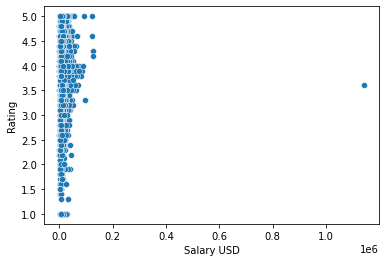

In [25]:
sns.scatterplot(x='Salary USD', y='Rating', data = sps_mean)

In [26]:
sps_mean[sps_mean['Salary USD']>1000000]

,Company Name,Rating,Salary,Salaries Reported,Salary USD
9414,Thapar University,3.6,90000000.0,1.0,1141263.0
